In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

In [ ]:
df=pd.read_csv("ravdess_train.csv")


In [ ]:
Counter(df["Vocal_channel_"])

Counter({1: 1080, 0: 748})

##UTILITIES

In [ ]:
!!pip install scikit-plot

['Requirement already satisfied: scikit-plot in /usr/local/lib/python3.10/dist-packages (0.3.7)',
 'Requirement already satisfied: matplotlib>=1.4.0 in /usr/local/lib/python3.10/dist-packages (from scikit-plot) (3.7.1)',
 'Requirement already satisfied: scikit-learn>=0.18 in /usr/local/lib/python3.10/dist-packages (from scikit-plot) (1.2.2)',
 'Requirement already satisfied: scipy>=0.9 in /usr/local/lib/python3.10/dist-packages (from scikit-plot) (1.10.1)',
 'Requirement already satisfied: joblib>=0.10 in /usr/local/lib/python3.10/dist-packages (from scikit-plot) (1.2.0)',
 'Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=1.4.0->scikit-plot) (1.1.0)',
 'Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=1.4.0->scikit-plot) (0.11.0)',
 'Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib>=1.4.0->scikit-plot) (4.40.0)'

##UTILITIES


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report


In [ ]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dal classificatore
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)
    print("____________________________________________")

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")

    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall,
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")

    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))

    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [ ]:
# La funzione stampa il ROC curve

# Prima di chiamare questa funzione dobbiamo aver
# scritto in y_pred il valore di ".predict" che come output fornirà 0 o 1
# dentro a y_score il valore di ".predict_proba" che darà solo la probabilità di 1
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print(roc_auc_score(y_test, y_score[:,1]))

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()


    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()


    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")
    plot_lift_curve(y_test, y_score)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

#Funzione per plottare
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def plot_decision_knn(X, y):

    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=5)
    title = "Learning Curves KNN "
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=5, min_samples_split=50)
    title = "Learning Curves DecisionTree"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    plt.show()

##K-NN

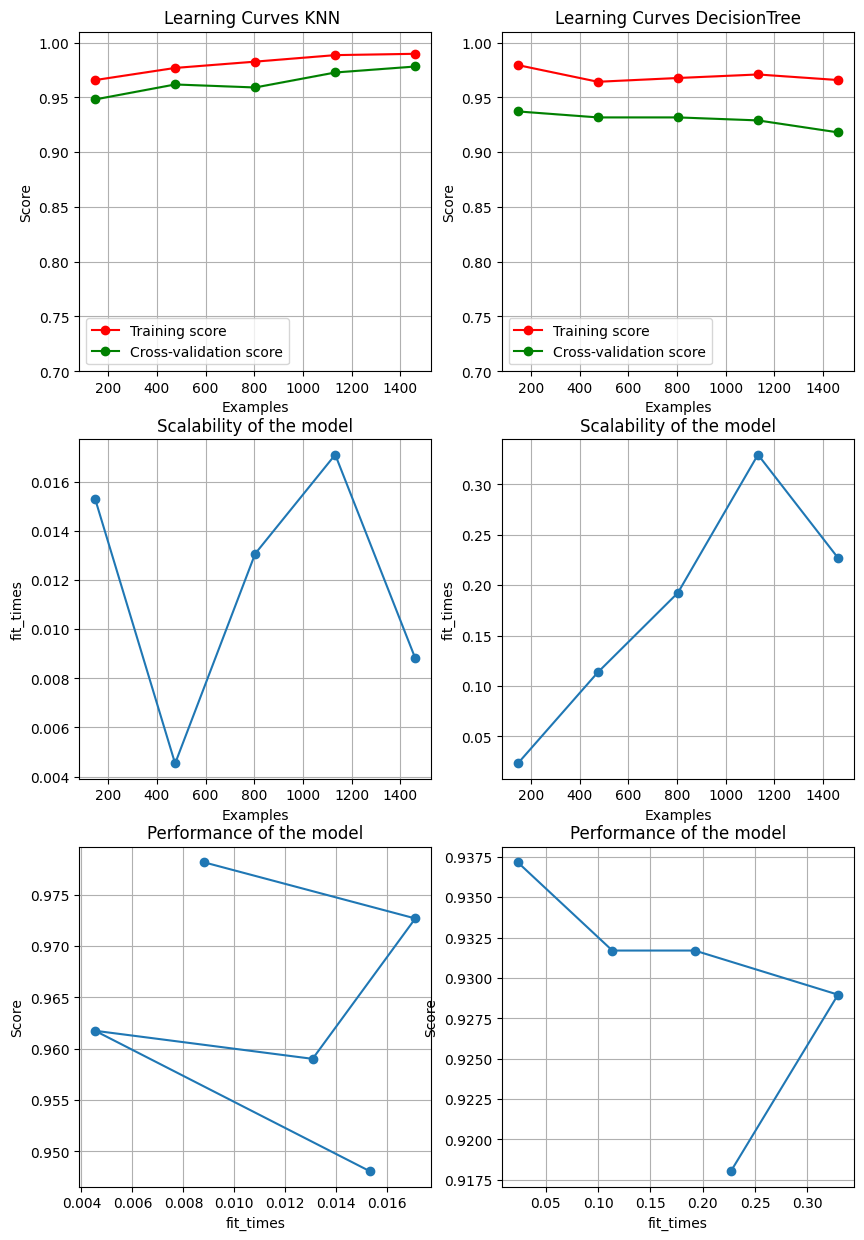

In [ ]:
class_name="Vocal_channel_"
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
plot_decision_knn(X, y)


In [ ]:
from sklearn.manifold import PCA
pca = TSNE(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

ImportError: ignored

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 1, min_samples_split = 5)

# Addestramento del modello
model.fit(X_train_pca, y_train)

# Predizione sui dati di test
y_pred = model.predict(X_test_pca)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza: {:.2f}%".format(accuracy * 100))

In [ ]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.prism, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

## Funzione utilizzata successivamente nella cross validation per automatizzare un po'
def testKNN(k):
    #Istanziamo il classificatore
    knn = KNeighborsClassifier(n_neighbors=k)
    #Facciamo cross validation
    results = cross_val_score(knn, X, y, cv=5)
    return results

In [ ]:
for k in range(30, 80):
    print(testKNN(k))

In [ ]:
#Grid search vera e propria
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
#parameters = {'n_neighbors': np.arange(1, 39), 'weights':['uniform', 'distance'], 'p':[1,2,3]}
parameters = {'n_neighbors': np.arange(80, 100)}
#scores = {"PRECISION":"precision", "ACCURACY": "accuracy", "F1":"f1", "RECALL":"recall"}
k_fold = StratifiedKFold(n_splits=4)

estimator_list = []
grid_list = []
result_list = []
best_params = []


knn = KNeighborsClassifier()
#for score in scores.values():
error = []
search = GridSearchCV(knn, parameters, error_score='raise', cv=k_fold)
#search = GridSearchCV(knn, parameters, scoring=score, error_score='raise', cv=k_fold)
search.fit(X_train, y_train)
grid_list.append(search)
#print(search.cv_results_)
clf = search.best_estimator_
estimator_list.append(clf)
result_list.append(search.cv_results_)
best_params.append(search.best_params_)
print(clf)
print("_____________________________________________")
print("Best parameters set found on development set:")
print()
print(search.best_params_)
print()
print("Grid scores on development set:")
print()
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()



In [ ]:
y_true, y_pred = y_test, search.predict(X_test)
print("STAMPIAMO LA MEDIA ERRORE: ")
print(np.mean(y_pred != y_true))
    #plt.figure(figsize=(12, 6))
    #range(1, 40),
    #plt.plot(np.arange(0, len(y_true)), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
    #plt.title('Error Rate K Value')
    #plt.xlabel('K Value')
    #plt.ylabel('Mean Error')
    #plt.grid()
    #plt.show()
print("_____________________________________________")
print(classification_report(y_true, y_pred))
print()
print("_____________________________________________")
print("_____________________________________________")
print(confusion_matrix(y_true, y_pred))
print()
print("_____________________________________________")

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(29, 80):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(29,80), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

INSERIAMO I PARAMETRI OTTENUTI DA GRID SEARCH E RUNNIAMO KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

STAMPIAMO LE METRICHE

In [ ]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 219 False negative: 16
 True positive: 308 False positive: 6
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9599


TypeError: ignored

GRAFICI

****** ROC CURVE + AUC?: passo passo *******


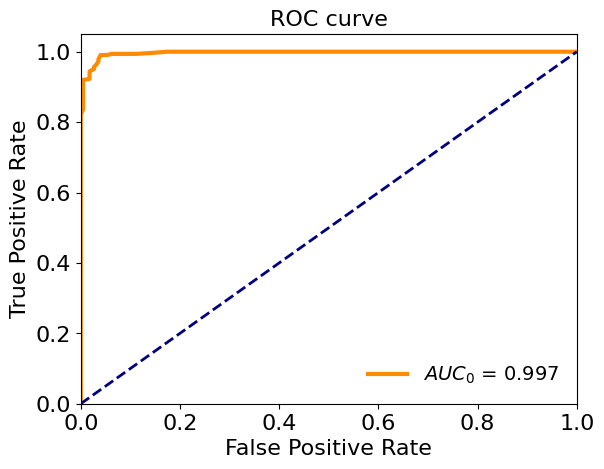

____________________________________
****** VALORE DI AUC *******
0.9966323731138547
____________________________________
****** ROC CURVE: con metodo diretto *******


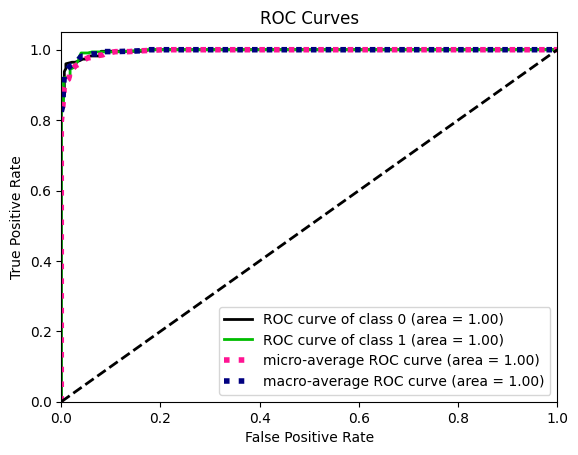

____________________________________
****** Precision recall: con metodo diretto *******


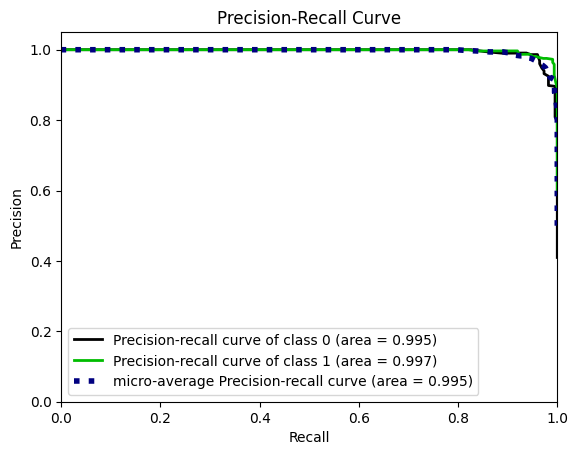

____________________________________
****** Cumulative gain: con metodo diretto *******


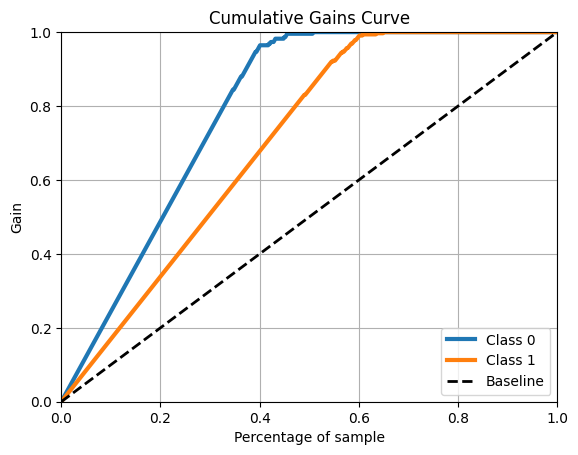

____________________________________
****** Lift curve: con metodo diretto *******


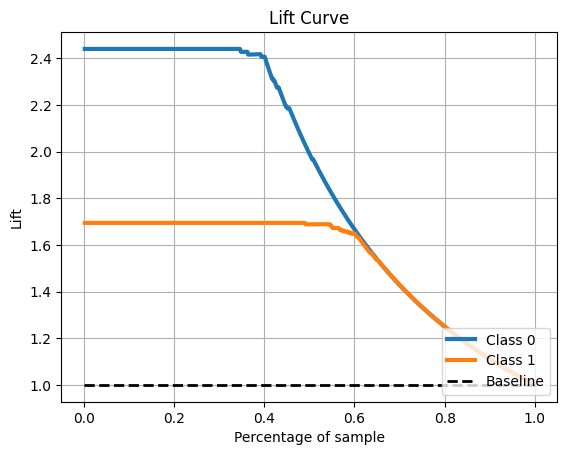

In [ ]:
y_score = knn.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

##DECISION TREE

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:

from sklearn.model_selection import GridSearchCV
'''''''''''''''''

# Set the parameters by cross-validation
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}

#scores = ['recall', 'f1']
scores = ['recall', 'f1', 'accuracy' , 'precision']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = tree.DecisionTreeClassifier()

    #if (score == "recall"):
    clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    #else:
    #  clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")
    ''''''''''''''''''''''''''''''''''

In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()

print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

print("**** Matrice di Confusione *****")
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(' True negative: %d False negative: %d' % (tn, fn))
print(' True positive: %d False positive: %d' % (tp, fp))
print("____________________________________________")


In [ ]:
result_pred(y_test, y_pred)

#ROC CURVE

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [ ]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)


In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
 best parameter target "vocalchannel"

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 1, min_samples_split = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result_pred(y_test, y_pred)

In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [ ]:
# Creazione del classificatore casuale
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='uniform')

# Addestramento del classificatore casuale
clf.fit(X_train, y_train)

# Predizione sul test set
y_pred = clf.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza del classificatore casuale: {:.2f}".format(accuracy))

##LOGISTIC REGRESSION

In [ ]:
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train.T[0].reshape(-1,1), y_train)
y_pred = clf.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5901639344262295
F1-score [0.         0.74226804]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.59      1.00      0.74       324

    accuracy                           0.59       549
   macro avg       0.30      0.50      0.37       549
weighted avg       0.35      0.59      0.44       549



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

ValueError: ignored

Prove Bilanciate

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


In [ ]:
plot_decision_knn(X_res, y_res)


##Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from scipy.special import expit

In [ ]:
Counter(df["Repetition"])


In [ ]:
selected_columns = ['Vocal_channel_']
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))


In [ ]:
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
result_pred(y_test, y_pred)

In [ ]:
y_score = logReg.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [ ]:
logReg.coef_

In [ ]:
logReg.intercept_

In [ ]:
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print(logReg.coef_)
print(logReg.intercept_)
result_pred(y_test, y_pred)


In [ ]:
loss = expit(sorted(X_test) * logReg.coef_ + logReg.intercept_).ravel()
#plt.plt(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Vocal Channel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * logReg.coef_ + logReg.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Vocal Channel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
selected_columns = ['Emotional_intensity']
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report


# Specify the target classes
classes = ["0", "1"]

# Instantiate the visualizer
visualizer = classification_report(
    LogisticRegression(), X_train, y_train, X_test, y_test, classes=classes, support=True
)
